# Data Prep
<font size=4 color='blue'>Project: Congressional Data Scrape and Validation</font>
***

**Project Summary:**  
The Resume of Congressional Activity has been published annually since 1947. PDF versions of this document are available for download from several US government websites, including <a href="https://senate.gov">senate.gov</a>. The primary goal of this project is to scrape the data from these documents and create a dataset that can be used for analysis.


**Notebook Scope:**  
This notebook reads formatted data from Excel and prepares the data for validation. 

**Output:**  
Scrubbed data is saved to an Excel file for further validation and analysis.

***
# Notebook Setup
***

In [12]:
# Import libraries
import os
import pandas as pd
import re
import matplotlib as mp
import matplotlib.pyplot as plt

In [13]:
%%html
<!-- Prevent text wrappping in dataframe displays for a cleaner print -->
<style> .dataframe td {white-space: nowrap;}</style>

***
# Read General Data
***

In [14]:
# Read in scrubbed legislative activity data and preview
leg_act_df = pd.read_excel('../data/general_legislative_data.xlsx')
leg_act_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,House,98,1,1983-01-03,1983-11-18,146.0,851:45,10665.0,NaN,114.0,...,440.0,237.0,385.0,35.0,297.0,201.0,4.0,1.0,29.0,NaN
1,Senate,98,1,1983-01-03,1983-11-18,150.0,1010:47,17224.0,NaN,101.0,...,209.0,86.0,302.0,18.0,381.0,NaN,3.0,NaN,4.0,NaN
2,Total,98,1,1983-01-03,1983-11-18,NaN,NaN,27889.0,5985.0,215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,33.0,NaN
3,House,98,2,1984-01-23,1984-10-12,120.0,852:59,12293.0,NaN,242.0,...,223.0,142.0,235.0,55.0,227.0,181.0,9.0,1.0,30.0,NaN
4,Senate,98,2,1984-01-23,1984-10-12,131.0,940:28,14650.0,NaN,166.0,...,150.0,69.0,186.0,19.0,292.0,NaN,8.0,NaN,22.0,NaN


***
## Handle Missing Data
***

In [15]:
# Verify that the Chmaber, Congress, Session, Start Date, and End Date columns do not have any missing data
id_cols = ['Chamber', 'Congress', 'Session', 'Start Date', 'End Date']
leg_act_df[id_cols].isna().sum()

Chamber       0
Congress      0
Session       0
Start Date    0
End Date      0
dtype: int64

In [16]:
# For all other columns, NaN can be assumed to be zero
leg_act_df.fillna(0, inplace=True)

In [17]:
leg_act_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,House,98,1,1983-01-03,1983-11-18,146.0,851:45,10665.0,0.0,114.0,...,440.0,237.0,385.0,35.0,297.0,201.0,4.0,1.0,29.0,0.0
1,Senate,98,1,1983-01-03,1983-11-18,150.0,1010:47,17224.0,0.0,101.0,...,209.0,86.0,302.0,18.0,381.0,0.0,3.0,0.0,4.0,0.0
2,Total,98,1,1983-01-03,1983-11-18,0.0,0,27889.0,5985.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,33.0,0.0
3,House,98,2,1984-01-23,1984-10-12,120.0,852:59,12293.0,0.0,242.0,...,223.0,142.0,235.0,55.0,227.0,181.0,9.0,1.0,30.0,0.0
4,Senate,98,2,1984-01-23,1984-10-12,131.0,940:28,14650.0,0.0,166.0,...,150.0,69.0,186.0,19.0,292.0,0.0,8.0,0.0,22.0,0.0


***
## Data Integrity
***

In [18]:
# Integrity Check: Congress data should range from 98 to 117
cong_min = leg_act_df['Congress'].min()
cong_max = leg_act_df['Congress'].max()
print(f'Congress range: {cong_min} to {cong_max}')

Congress range: 98 to 117


In [19]:
# Integrity Check: There should be 6 rows for each Congress
con_counts = leg_act_df['Congress'].value_counts()
con_counts.unique()

array([6], dtype=int64)

In [20]:
# Integrity Check: Chamber should contain House, Senate, or Total, with 40 rows each
leg_act_df['Chamber'].value_counts()

Chamber
House     40
Senate    40
Total     40
Name: count, dtype: int64

In [21]:
# Integrity Check: Dates should range from 1983 to 2023
cong_min = leg_act_df['Start Date'].min()
cong_max = leg_act_df['Start Date'].max()
print(f'Start Date range: {cong_min.year} to {cong_max.year}')
cong_min = leg_act_df['End Date'].min()
cong_max = leg_act_df['End Date'].max()
print(f'End Date range: {cong_min.year} to {cong_max.year}')

Start Date range: 1983 to 2022
End Date range: 1983 to 2023


In [22]:
# Integrity Check: Days in session should not exceed 365 for Senate or House
no_totals_df = leg_act_df[leg_act_df['Chamber'] != 'Total']
print(f'Days in Session max: {int(no_totals_df['Days in session'].max())}')

Days in Session max: 211


In [23]:
# Hours in session cannot exceed days in session x 24 for Senate or House
temp_df = no_totals_df[['Congress', 'Session', 'Days in session', 'Time in session']].copy()
temp_df['Hours in session'] = temp_df['Time in session'].str.split(':').str[0]
temp_df['Check'] = temp_df['Days in session'].astype(int) * 24
temp_df = temp_df[temp_df['Check'] < temp_df['Hours in session'].astype(int)]
if len(temp_df) == 0:
    print('All Hours in Session values are below the max threshold.')
else:
    display(temp_df)

All Hours in Session values are below the max threshold.


***
## Verify Session Dates
***

In [24]:
# Read in data 
dates_df = pd.read_excel('../Data/session_dates.xlsx')
dates_df.head()

,Congress,Session,Start Date,End Date
0,117,1,2021-01-03,2022-01-03
1,117,2,2022-01-03,2023-01-03
2,116,1,2019-01-03,2020-01-03
3,116,2,2020-01-03,2021-01-03
4,115,1,2017-01-03,2018-01-03


In [25]:
leg_act_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,House,98,1,1983-01-03,1983-11-18,146.0,851:45,10665.0,0.0,114.0,...,440.0,237.0,385.0,35.0,297.0,201.0,4.0,1.0,29.0,0.0
1,Senate,98,1,1983-01-03,1983-11-18,150.0,1010:47,17224.0,0.0,101.0,...,209.0,86.0,302.0,18.0,381.0,0.0,3.0,0.0,4.0,0.0
2,Total,98,1,1983-01-03,1983-11-18,0.0,0,27889.0,5985.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,33.0,0.0
3,House,98,2,1984-01-23,1984-10-12,120.0,852:59,12293.0,0.0,242.0,...,223.0,142.0,235.0,55.0,227.0,181.0,9.0,1.0,30.0,0.0
4,Senate,98,2,1984-01-23,1984-10-12,131.0,940:28,14650.0,0.0,166.0,...,150.0,69.0,186.0,19.0,292.0,0.0,8.0,0.0,22.0,0.0


In [26]:
# Validate session dates
valid = True
temp_df = leg_act_df[['Congress', 'Session', 'Start Date', 'End Date']].drop_duplicates()
for i, row in temp_df.iterrows():
    web_start_date = dates_df[(dates_df['Congress'] == row['Congress']) & (dates_df['Session'] == row['Session'])]['Start Date'].values[0]
    web_start_date = pd.to_datetime(web_start_date).date()
    resume_start_date = row['Start Date'].date()
    if web_start_date != resume_start_date:
        print(f'Error: {row['Congress']}, {row['Session']} - Start Date\nResume: {resume_start_date}     Congress.gov: {web_start_date}')
    web_end_date = dates_df[(dates_df['Congress'] == row['Congress']) & (dates_df['Session'] == row['Session'])]['End Date'].values[0]
    web_end_date = pd.to_datetime(web_end_date).date()
    resume_end_date = row['End Date'].date()
    if web_end_date != resume_end_date:
        print(f'Error: {row['Congress']}, {row['Session']} - End Date\nResume: {resume_end_date}     Congress.gov: {web_end_date}')

Error: 105, 1 - Start Date
Resume: 1997-01-03     Congress.gov: 1997-01-07
Error: 105, 2 - End Date
Resume: 1998-10-21     Congress.gov: 1998-12-19
Error: 108, 2 - Start Date
Resume: 2004-01-03     Congress.gov: 2004-01-20
Error: 108, 2 - End Date
Resume: 2004-12-31     Congress.gov: 2004-12-08
Error: 109, 2 - End Date
Resume: 2006-12-31     Congress.gov: 2006-12-09
Error: 110, 1 - End Date
Resume: 2007-12-31     Congress.gov: 2007-12-19
Error: 111, 1 - End Date
Resume: 2009-12-31     Congress.gov: 2009-12-24
Error: 111, 2 - End Date
Resume: 2010-12-31     Congress.gov: 2010-12-22
Error: 112, 1 - End Date
Resume: 2012-01-03     Congress.gov: 2012-01-02
Error: 114, 1 - End Date
Resume: 2015-12-31     Congress.gov: 2015-12-18


***
<font color='blue'>**Note:**</font>  
Any OCR errors found were updated directly in the Excel files. Details on the remaining data issues listed above are documented in the Data Integrity Issues Excel document available in the project's GitHub repository.

***
## Check for Outliers
***

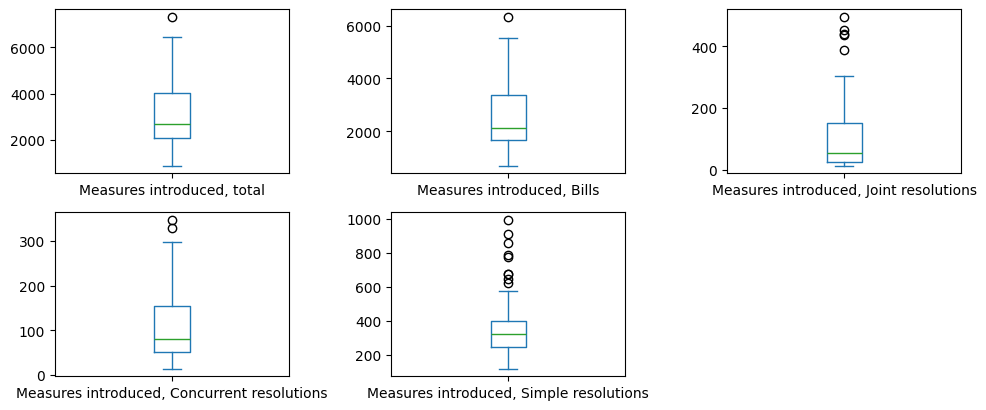

In [27]:
# Check for data outliers - Measures Introduced
cols_to_plot = no_totals_df[no_totals_df.columns[no_totals_df.columns.str.startswith('Measures introduced')]].columns.to_list()
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [28]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures introduced, total","Measures introduced, Bills","Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions"
count,80,80,80,80,80
mean,3024,2450,105,109,359
std,1428,1210,115,81,182
min,860,687,13,14,116
25%,2081,1661,27,51,244
50%,2668,2108,56,80,324
75%,4003,3375,151,155,395
max,7335,6343,496,348,996


In [29]:
# Review outliers in Measures introduced, total column
temp_df = no_totals_df.sort_values('Measures introduced, total', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, total']].head()

,Congress,Session,Chamber,"Measures introduced, total"
114,117,1,House,7335.0
108,116,1,House,6467.0
72,110,1,House,6194.0
66,109,1,House,5703.0
78,111,1,House,5699.0


In [30]:
# Review outliers in Measures introduced, Bills columns
temp_df = no_totals_df.sort_values('Measures introduced, Bills', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Bills']].head()

,Congress,Session,Chamber,"Measures introduced, Bills"
114,117,1,House,6343.0
108,116,1,House,5529.0
72,110,1,House,4930.0
102,115,1,House,4724.0
66,109,1,House,4653.0


In [31]:
# Review outliers in Measures introduced, Joint resolutions columns
temp_df = no_totals_df.sort_values('Measures introduced, Joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Joint resolutions']].head()

,Congress,Session,Chamber,"Measures introduced, Joint resolutions"
6,99,1,House,496.0
18,101,1,House,454.0
0,98,1,House,440.0
12,100,1,House,437.0
24,102,1,House,387.0


In [32]:
# Review outliers in Measures introduced, Concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures introduced, Concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures introduced, Concurrent resolutions"
60,108,1,House,348.0
66,109,1,House,330.0
54,107,1,House,298.0
72,110,1,House,278.0
6,99,1,House,267.0


In [33]:
# Review outliers in Measures introduced, Simple resolutions columns
temp_df = no_totals_df.sort_values('Measures introduced, Simple resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Simple resolutions']].head()

,Congress,Session,Chamber,"Measures introduced, Simple resolutions"
78,111,1,House,996.0
72,110,1,House,911.0
114,117,1,House,859.0
81,111,2,House,788.0
108,116,1,House,775.0


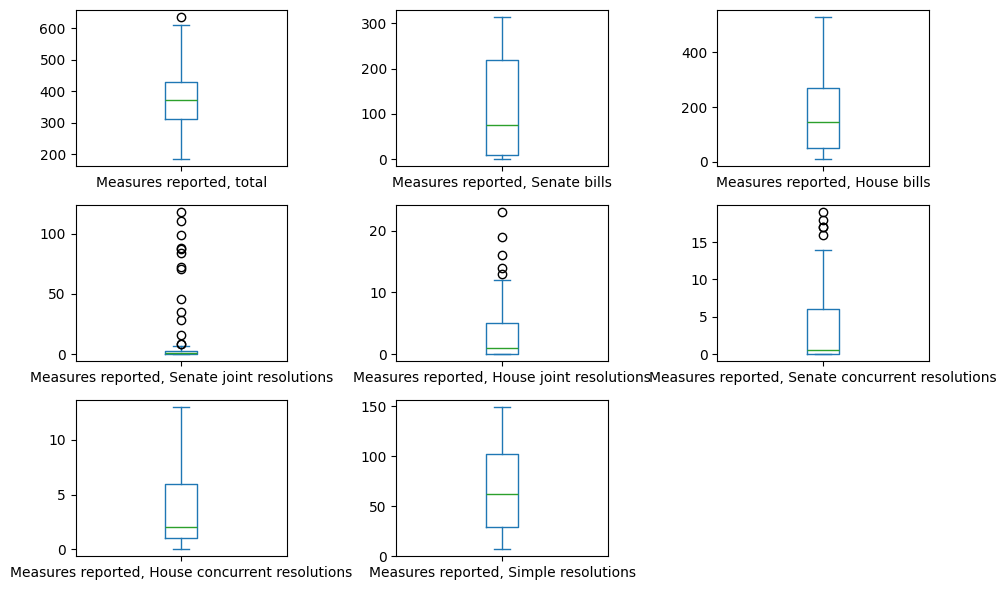

In [34]:
# Check for data outliers - Measures Reported
cols_to_plot = no_totals_df[no_totals_df.columns[no_totals_df.columns.str.startswith('Measures reported')]].columns.to_list()
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [35]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures reported, total","Measures reported, Senate bills","Measures reported, House bills","Measures reported, Senate joint resolutions","Measures reported, House joint resolutions","Measures reported, Senate concurrent resolutions","Measures reported, House concurrent resolutions","Measures reported, Simple resolutions"
count,80,80,80,80,80,80,80,80
mean,374,111,170,11,3,3,3,67
std,101,107,124,28,4,5,3,40
min,185,0,10,0,0,0,0,7
25%,311,8,49,0,0,0,1,29
50%,372,76,146,1,1,0,2,62
75%,431,219,268,3,5,6,6,102
max,636,314,529,118,23,19,13,149


In [36]:
# Review outliers in Measures reported,total columns
temp_df = no_totals_df.sort_values('Measures reported, total', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, total']].head()

,Congress,Session,Chamber,"Measures reported, total"
15,100,2,House,636.0
105,115,2,House,610.0
1,98,1,Senate,570.0
4,98,2,Senate,568.0
27,102,2,House,553.0


In [37]:
# Review outliers in Measures reported, Senate joint resolutions columns
temp_df = no_totals_df.sort_values('Measures reported, Senate joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, Senate joint resolutions']].head()

,Congress,Session,Chamber,"Measures reported, Senate joint resolutions"
7,99,1,Senate,118.0
10,99,2,Senate,111.0
4,98,2,Senate,99.0
16,100,2,Senate,88.0
1,98,1,Senate,87.0


In [38]:
# Review outliers in Measures reported, House joint resolutions columns
temp_df = no_totals_df.sort_values('Measures reported, House joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, House joint resolutions']].head()

,Congress,Session,Chamber,"Measures reported, House joint resolutions"
10,99,2,Senate,23.0
7,99,1,Senate,19.0
4,98,2,Senate,16.0
6,99,1,House,14.0
9,99,2,House,13.0


In [39]:
# Review outliers in Measures reported, Senate concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures reported, Senate concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, Senate concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures reported, Senate concurrent resolutions"
1,98,1,Senate,19.0
22,101,2,Senate,18.0
4,98,2,Senate,17.0
55,107,1,Senate,17.0
7,99,1,Senate,16.0


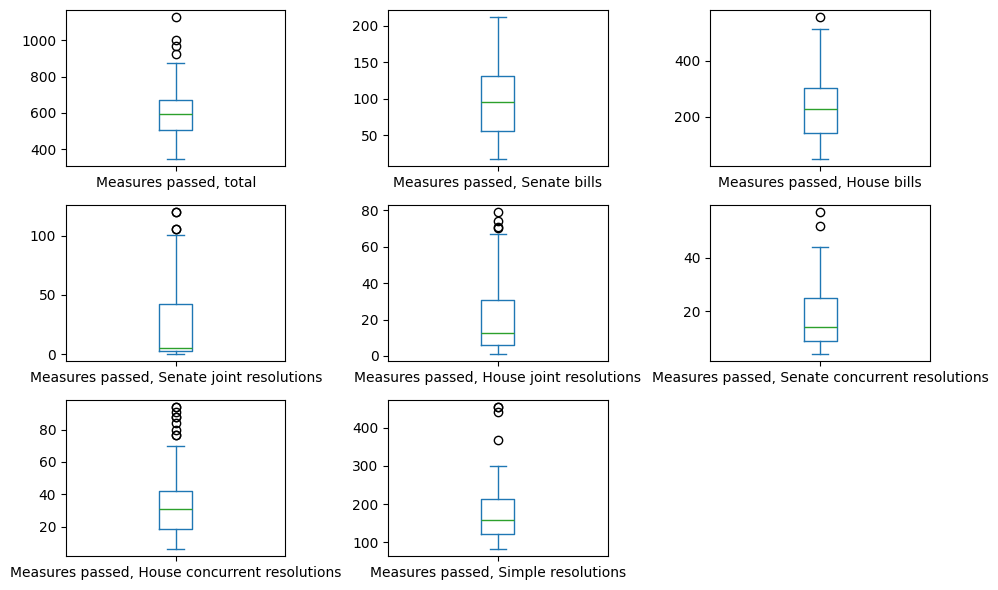

In [40]:
# Check for data outliers - Measures Passed
cols_to_plot = no_totals_df[no_totals_df.columns[no_totals_df.columns.str.startswith('Measures passed')]].columns.to_list()
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [41]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures passed, total","Measures passed, Senate bills","Measures passed, House bills","Measures passed, Senate joint resolutions","Measures passed, House joint resolutions","Measures passed, Senate concurrent resolutions","Measures passed, House concurrent resolutions","Measures passed, Simple resolutions"
count,80,80,80,80,80,80,80,80
mean,609,99,233,24,22,17,35,175
std,149,51,113,35,22,11,22,79
min,346,17,48,0,1,4,6,82
25%,506,55,140,3,6,9,18,123
50%,597,96,226,5,12,14,31,158
75%,669,131,304,42,31,25,42,213
max,1127,212,557,120,79,57,94,454


In [42]:
# Review outliers in Measures passed, total columns
temp_df = no_totals_df.sort_values('Measures passed, total', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, total']].head()

,Congress,Session,Chamber,"Measures passed, total"
72,110,1,House,1127.0
75,110,2,House,999.0
78,111,1,House,970.0
81,111,2,House,922.0
51,106,2,House,877.0


In [43]:
# Review outliers in Measures passed, House bills columns
temp_df = no_totals_df.sort_values('Measures passed, House bills', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, total']].head()

,Congress,Session,Chamber,"Measures passed, total"
105,115,2,House,816.0
72,110,1,House,1127.0
99,114,2,House,659.0
102,115,1,House,668.0
75,110,2,House,999.0


In [44]:
# Review outliers in Measures passed, Senate joint resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, Senate joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, Senate joint resolutions']].head()

,Congress,Session,Chamber,"Measures passed, Senate joint resolutions"
7,99,1,Senate,120.0
10,99,2,Senate,120.0
19,101,1,Senate,106.0
16,100,2,Senate,106.0
9,99,2,House,101.0


In [45]:
# Review outliers in Measures passed, House joint resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, House joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, House joint resolutions']].head()

,Congress,Session,Chamber,"Measures passed, House joint resolutions"
9,99,2,House,79.0
10,99,2,Senate,74.0
6,99,1,House,71.0
15,100,2,House,70.0
24,102,1,House,67.0


In [46]:
# Review outliers in Measures passed, Senate concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, Senate concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, Senate concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures passed, Senate concurrent resolutions"
52,106,2,Senate,57.0
16,100,2,Senate,52.0
64,108,2,Senate,44.0
55,107,1,Senate,43.0
19,101,1,Senate,39.0


In [47]:
# Review outliers in Measures passed, House concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, House concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, House concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures passed, House concurrent resolutions"
75,110,2,House,94.0
72,110,1,House,94.0
54,107,1,House,91.0
63,108,2,House,88.0
66,109,1,House,88.0


In [48]:
# Review outliers in Measures passed, Simple resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, Simple resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, Simple resolutions']].head()

,Congress,Session,Chamber,"Measures passed, Simple resolutions"
78,111,1,House,454.0
72,110,1,House,453.0
81,111,2,House,440.0
75,110,2,House,369.0
73,110,1,Senate,301.0


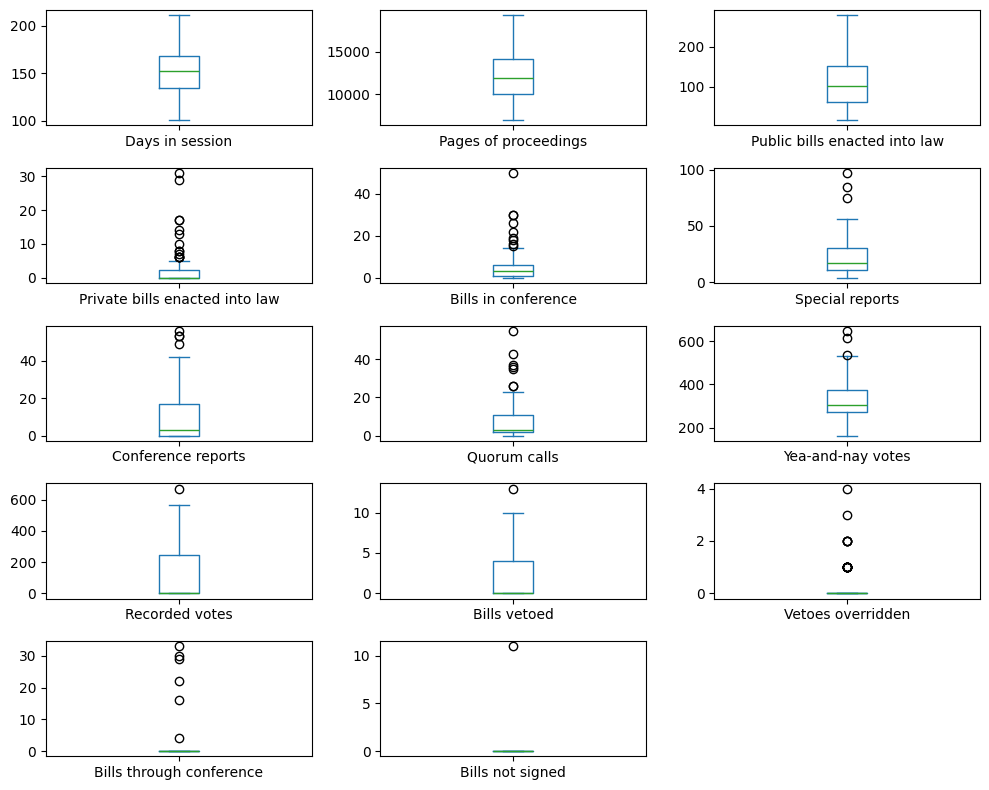

In [49]:
# Review outliers in remaining numeric columns
cols_to_plot = [x for x in no_totals_df.columns if x not in id_cols and not x.startswith('Measures')]
cols_to_plot.remove('Time in session')
cols_to_plot.remove('Extensions of remarks')
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(5,3), figsize=(10,8))
plt.tight_layout()
plt.show()

In [50]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,Days in session,Pages of proceedings,Public bills enacted into law,Private bills enacted into law,Bills in conference,Special reports,Conference reports,Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
count,80,80,80,80,80,80,80,80,80,80,80,80,80,80
mean,152,12257,114,2,5,23,10,8,328,135,2,0,1,0
std,23,3256,64,5,8,18,15,10,92,166,3,0,6,1
min,101,6941,16,0,0,4,0,0,163,0,0,0,0,0
25%,134,9961,61,0,1,11,0,2,270,0,0,0,0,0
50%,152,11900,101,0,3,17,3,3,304,0,0,0,0,0
75%,168,14212,153,2,6,30,17,11,375,243,4,0,0,0
max,211,19345,280,31,50,97,56,55,648,671,13,4,33,11


In [51]:
# Review outliers in Private bills enacted into law columns
temp_df = no_totals_df.sort_values('Private bills enacted into law', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Private bills enacted into law']].head()

,Congress,Session,Chamber,Private bills enacted into law
15,100,2,House,31.0
3,98,2,House,29.0
9,99,2,House,17.0
4,98,2,Senate,17.0
27,102,2,House,14.0


In [52]:
# Review outliers in Bills in conference columns
temp_df = no_totals_df.sort_values('Bills in conference', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Bills in conference']].head()

,Congress,Session,Chamber,Bills in conference
22,101,2,Senate,50.0
19,101,1,Senate,30.0
49,106,1,Senate,30.0
52,106,2,Senate,26.0
61,108,1,Senate,22.0


In [53]:
# Review outliers in Special reports columns
temp_df = no_totals_df.sort_values('Special reports', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Special reports']].head()

,Congress,Session,Chamber,Special reports
9,99,2,House,97.0
15,100,2,House,85.0
21,101,2,House,75.0
12,100,1,House,56.0
0,98,1,House,54.0


In [54]:
# Review outliers in Conference reports columns
temp_df = no_totals_df.sort_values('Conference reports', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Conference reports']].head()

,Congress,Session,Chamber,Conference reports
21,101,2,House,56.0
3,98,2,House,53.0
27,102,2,House,53.0
15,100,2,House,49.0
33,103,2,House,42.0


In [55]:
# Review outliers in Quorum calls columns
temp_df = no_totals_df.sort_values('Quorum calls', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Quorum calls']].head()

,Congress,Session,Chamber,Quorum calls
3,98,2,House,55.0
6,99,1,House,43.0
9,99,2,House,37.0
13,100,1,Senate,36.0
0,98,1,House,35.0


In [56]:
# Review outliers in Quorum calls columns
temp_df = no_totals_df.sort_values('Quorum calls', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Quorum calls']].head()

,Congress,Session,Chamber,Quorum calls
3,98,2,House,55.0
6,99,1,House,43.0
9,99,2,House,37.0
13,100,1,Senate,36.0
0,98,1,House,35.0


In [57]:
# Review outliers in Yea-and-nay votes columns
temp_df = no_totals_df.sort_values('Yea-and-nay votes', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Yea-and-nay votes']].head()

,Congress,Session,Chamber,Yea-and-nay votes
72,110,1,House,648.0
37,104,1,Senate,613.0
78,111,1,House,535.0
117,117,2,House,532.0
115,117,1,Senate,528.0


In [58]:
# Review outliers in Recorded votes columns
temp_df = no_totals_df.sort_values('Recorded votes', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Recorded votes']].head()

,Congress,Session,Chamber,Recorded votes
84,112,1,House,671.0
36,104,1,House,568.0
72,110,1,House,529.0
78,111,1,House,452.0
87,112,2,House,412.0


In [59]:
# Review outliers in Bills vetoed columns
temp_df = no_totals_df.sort_values('Bills vetoed', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Bills vetoed']].head()

,Congress,Session,Chamber,Bills vetoed
27,102,2,House,13.0
9,99,2,House,10.0
15,100,2,House,10.0
18,101,1,House,9.0
3,98,2,House,9.0


***
<font color='blue'>**Note:**</font>  
Outlier data was confirmed against original PDF downloads for OCR or data prep errore, and no issues were found.

***
## Validate Session Totals
***

In [60]:
# Create a dataframe that includes only rows where Chamber equals Total
totals_df = leg_act_df[leg_act_df['Chamber'] == 'Total'].copy()
totals_df.drop(columns=['Start Date', 'End Date'], inplace=True)

In [61]:
# Identify columns that contain data
cols = totals_df.columns[(totals_df!=0).any()].to_list()
cols.remove('Chamber')
cols.remove('Congress')
cols.remove('Session')
print(cols)

['Pages of proceedings', 'Extensions of remarks', 'Public bills enacted into law', 'Private bills enacted into law', 'Bills in conference', 'Measures passed, total', 'Measures reported, total', 'Measures introduced, total', 'Bills vetoed', 'Vetoes overridden', 'Bills through conference']


In [62]:
# Validate totals are equal to House + Senate
valid = True
for col in cols:
    for cong in leg_act_df['Congress'].unique():
        for sess in range(1, 3):
            pub_tot = totals_df[(totals_df['Congress'] == cong) & (totals_df['Session'] == sess)][col].values[0]
            calc_tot = no_totals_df[(no_totals_df['Congress'] == cong) & (no_totals_df['Session'] == sess)][col].sum()
            if pub_tot > 0 and calc_tot > 0:
                if pub_tot != calc_tot:
                    print(f'Error: {cong},{sess} {col}\nPublished total: {pub_tot}      Calculated total: {calc_tot}')
                    valid = False
if valid:
    print('No errors found')

Error: 98,2 Pages of proceedings
Published total: 26896.0      Calculated total: 26943.0
Error: 103,1 Pages of proceedings
Published total: 18243.0      Calculated total: 28243.0
Error: 103,1 Measures passed, total
Published total: 1010.0      Calculated total: 1020.0
Error: 106,1 Measures reported, total
Published total: 795.0      Calculated total: 798.0
Error: 99,2 Vetoes overridden
Published total: 1.0      Calculated total: 2.0


***
<font color='blue'>**Note:**</font>  
Any OCR errors found were updated directly in the Excel files. Details on the remaining data issues listed above are documented in the Data Integrity Issues Excel spreadsheet published with this project in GitHub.

***
## Verify Measure Total and Details
***

In [63]:
# For each Congress, Session, and Chamber, compare the Measure totals (introduced, reported, passed) against the sum of the details
# lines in each section
valid = True
sections = ['Measures introduced', 'Measures reported', 'Measures passed']
for i, row in no_totals_df.iterrows():
    for section in sections:
        pub_total_col = section + ', total'
        pub_total = row[pub_total_col]
        calc_total_cols = [x for x in no_totals_df.columns if section in x and 'total' not in x]
        calc_total = row[calc_total_cols].sum()
        if pub_total != calc_total:
            print(f'Error: {row['Congress']}, {row['Session']}, {row['Chamber']} - {section}')
            print(f'       Published Total: {pub_total}     Calculated Total: {calc_total}')

Error: 98, 1, House - Measures reported
       Published Total: 497.0     Calculated Total: 501.0
Error: 98, 2, House - Measures passed
       Published Total: 737.0     Calculated Total: 764.0
Error: 99, 1, Senate - Measures passed
       Published Total: 583.0     Calculated Total: 584.0
Error: 100, 2, House - Measures reported
       Published Total: 636.0     Calculated Total: 502.0
Error: 101, 1, Senate - Measures reported
       Published Total: 387.0     Calculated Total: 388.0
Error: 101, 2, House - Measures passed
       Published Total: 772.0     Calculated Total: 773.0
Error: 103, 1, House - Measures passed
       Published Total: 547.0     Calculated Total: 527.0
Error: 103, 2, House - Measures reported
       Published Total: 392.0     Calculated Total: 389.0
Error: 104, 1, House - Measures introduced
       Published Total: 3430.0     Calculated Total: 3431.0
Error: 105, 1, Senate - Measures passed
       Published Total: 385.0     Calculated Total: 386.0
Error: 108, 1, S

***
<font color='blue'>**Note:**</font>  
Any OCR errors found were updated directly in the Excel files. Details on the remaining data issues listed above are documented in the Data Integrity Issues Excel spreadsheet published with this project in GitHub.

***
# Read Confirmation Data
***

In [64]:
# Read in scrubbed confirmation data and preview
confirm_df = pd.read_excel('../data/confirmation_data.xlsx')
confirm_df.head()

,Congress,Session,Start Date,End Date,"Civilian, New nominations","Civilian, Confirmed","Civilian, Unconfirmed","Civilian, Withdrawn","Civilian, Rejected","Civilian, Returned",...,"Space Force, Unconfirmed","Space Force, Withdrawn","Space Force, Carryover nominations","Air Force, Failed","Civilian, Recess reappointments",Total recess reappointments,"Army, Failed","Civilian, Failed","Navy, Returned",Total failed
0,98,1,1983-01-03,1983-11-18,3454,2978,0,2,NaN,0,...,NaN,NaN,NaN,1.0,0,0,2,474,0,477
1,98,2,1984-01-23,1984-10-12,4127,4001,107,2,NaN,0,...,NaN,NaN,NaN,NaN,17,17,0,0,0,0
2,99,1,1985-01-03,1985-12-20,3719,3603,69,7,NaN,0,...,NaN,NaN,NaN,NaN,6,6,0,34,0,34
3,99,2,1986-01-21,1986-10-18,2046,2037,70,8,NaN,0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,100,1,1987-01-06,1987-12-22,4718,4569,122,10,NaN,16,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


***
## Handle Missing Data
***

In [65]:
# Verify that the Chmaber, Congress, Session, Start Date, and End Date columns do not have any missing data
id_cols = ['Congress', 'Session', 'Start Date', 'End Date']
confirm_df[id_cols].isna().sum()

Congress      0
Session       0
Start Date    0
End Date      0
dtype: int64

In [66]:
# For all other columns, NaN can be assumed to be zero
confirm_df.fillna(0, inplace=True)

In [67]:
confirm_df.head()

,Congress,Session,Start Date,End Date,"Civilian, New nominations","Civilian, Confirmed","Civilian, Unconfirmed","Civilian, Withdrawn","Civilian, Rejected","Civilian, Returned",...,"Space Force, Unconfirmed","Space Force, Withdrawn","Space Force, Carryover nominations","Air Force, Failed","Civilian, Recess reappointments",Total recess reappointments,"Army, Failed","Civilian, Failed","Navy, Returned",Total failed
0,98,1,1983-01-03,1983-11-18,3454,2978,0,2,0.0,0,...,0.0,0.0,0.0,1.0,0,0,2,474,0,477
1,98,2,1984-01-23,1984-10-12,4127,4001,107,2,0.0,0,...,0.0,0.0,0.0,0.0,17,17,0,0,0,0
2,99,1,1985-01-03,1985-12-20,3719,3603,69,7,0.0,0,...,0.0,0.0,0.0,0.0,6,6,0,34,0,34
3,99,2,1986-01-21,1986-10-18,2046,2037,70,8,0.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,100,1,1987-01-06,1987-12-22,4718,4569,122,10,0.0,16,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


***
## Data Integrity
***

In [68]:
# Integrity Check: Congress data should range from 98 to 117
cong_min = confirm_df['Congress'].min()
cong_max = confirm_df['Congress'].max()
print(f'Congress range: {cong_min} to {cong_max}')

Congress range: 98 to 117


In [69]:
# Integrity Check: There should be 2 rows for each Congress
con_counts = confirm_df['Congress'].value_counts()
con_counts.unique()

array([2], dtype=int64)

In [70]:
# Integrity Check: Dates should range from 1983 to 2023
cong_min = confirm_df['Start Date'].min()
cong_max = confirm_df['Start Date'].max()
print(f'Start Date range: {cong_min.year} to {cong_max.year}')
cong_min = confirm_df['End Date'].min()
cong_max = confirm_df['End Date'].max()
print(f'End Date range: {cong_min.year} to {cong_max.year}')

Start Date range: 1983 to 2022
End Date range: 1983 to 2023


***
## Verify Session Dates
***

In [77]:
# Validate session dates against the legislative activity dataframe, which has already been verified
valid = True
temp_confirm_df = confirm_df[['Congress', 'Session', 'Start Date', 'End Date']].drop_duplicates()
temp_leg_df = leg_act_df[['Congress', 'Session', 'Start Date', 'End Date']].drop_duplicates()
for i, row in temp_confirm_df.iterrows():
    leg_start_date = temp_leg_df[(temp_leg_df['Congress'] == row['Congress']) & (temp_leg_df['Session'] == row['Session'])]['Start Date'].values[0]
    leg_start_date = pd.to_datetime(leg_start_date).date()
    confirm_start_date = row['Start Date'].date()
    if leg_start_date != confirm_start_date:
        print(f'Error: {row['Congress']}, {row['Session']} - Start Date\nConfirmation: {confirm_start_date}     Legislative: {leg_start_date}')

    leg_end_date = temp_leg_df[(temp_leg_df['Congress'] == row['Congress']) & (temp_leg_df['Session'] == row['Session'])]['End Date'].values[0]
    leg_end_date = pd.to_datetime(leg_end_date).date()
    confirm_end_date = row['End Date'].date()
    if confirm_end_date != leg_end_date:
        print(f'Error: {row['Congress']}, {row['Session']} - End Date\nConfirmation: {confirm_end_date}     Legislative: {leg_end_date}')

Error: 103, 1 - End Date
Confirmation: 1993-11-24     Legislative: 1993-11-26
Error: 104, 2 - End Date
Confirmation: 1996-10-03     Legislative: 1996-10-04
Error: 106, 2 - End Date
Confirmation: 2000-12-31     Legislative: 2000-12-15
Error: 107, 1 - End Date
Confirmation: 2001-12-31     Legislative: 2001-12-20
Error: 108, 1 - End Date
Confirmation: 2003-12-31     Legislative: 2003-12-09
Error: 108, 2 - Start Date
Confirmation: 2004-01-20     Legislative: 2004-01-03


***
<font color='blue'>**Note:**</font>  
Any OCR errors found were updated directly in the Excel files. Details on the remaining data issues listed above are documented in the Data Integrity Issues Excel document available in the project's GitHub repository.

***
## Check for Outliers
***

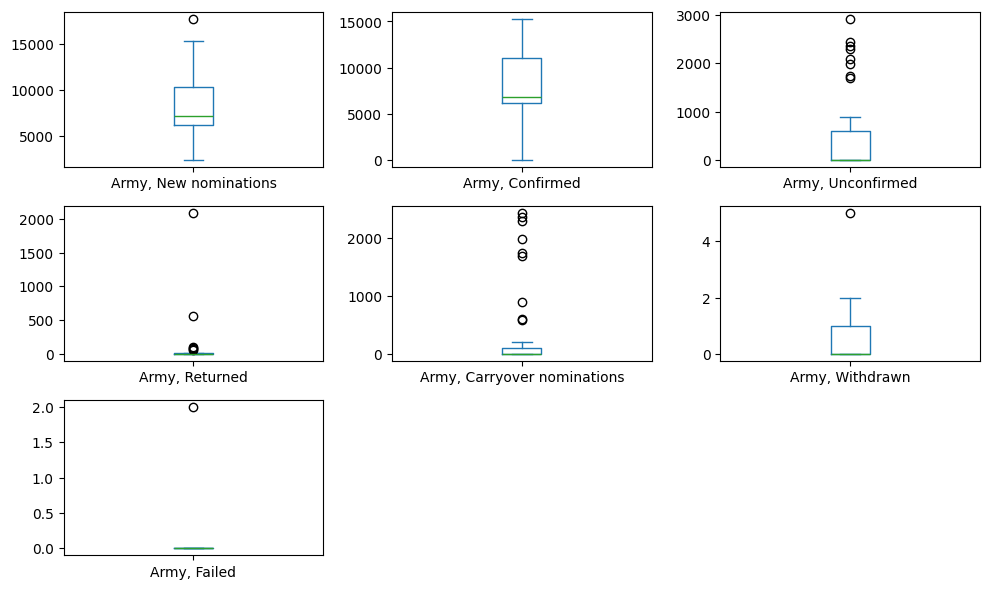

In [80]:
# Check for data outliers - Army
cols_to_plot = confirm_df[confirm_df.columns[confirm_df.columns.str.startswith('Army')]].columns.to_list()
confirm_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [81]:
# Take a closer look at the numbers
confirm_df[cols_to_plot].describe().astype('int')

,"Army, New nominations","Army, Confirmed","Army, Unconfirmed","Army, Returned","Army, Carryover nominations","Army, Withdrawn","Army, Failed"
count,40,40,40,40,40,40,40
mean,8470,8270,502,76,376,0,0
std,3477,3410,892,338,761,1,0
min,2441,0,0,0,0,0,0
25%,6243,6205,0,0,0,0,0
50%,7182,6846,8,0,0,0,0
75%,10333,11020,597,10,108,1,0
max,17754,15312,2924,2089,2441,5,2


In [83]:
# Review outliers in Army, New nominations column
temp_df = confirm_df.sort_values('Army, New nominations', ascending=False)
temp_df[['Congress', 'Session', 'Army, New nominations']].head()

,Congress,Session,"Army, New nominations"
6,101,1,17754
2,99,1,15370
0,98,1,14784
4,100,1,14448
1,98,2,14031


In [84]:
# Review outliers in Army, Unconfirmed column
temp_df = confirm_df.sort_values('Army, Unconfirmed', ascending=False)
temp_df[['Congress', 'Session', 'Army, Unconfirmed']].head()

,Congress,Session,"Army, Unconfirmed"
7,101,2,2924.0
6,101,1,2441.0
4,100,1,2361.0
12,104,1,2304.0
39,117,2,2089.0


In [85]:
# Review outliers in Army, Returned column
temp_df = confirm_df.sort_values('Army, Returned', ascending=False)
temp_df[['Congress', 'Session', 'Army, Returned']].head()

,Congress,Session,"Army, Returned"
39,117,2,2089
17,106,2,558
18,107,1,108
21,108,2,91
25,110,2,73


In [86]:
# Review outliers in Army, Carryover nominations
temp_df = confirm_df.sort_values('Army, Carryover nominations', ascending=False)
temp_df[['Congress', 'Session', 'Army, Carryover nominations']].head()

,Congress,Session,"Army, Carryover nominations"
7,101,2,2441.0
5,100,2,2361.0
13,104,2,2304.0
39,117,2,1992.0
33,114,2,1740.0


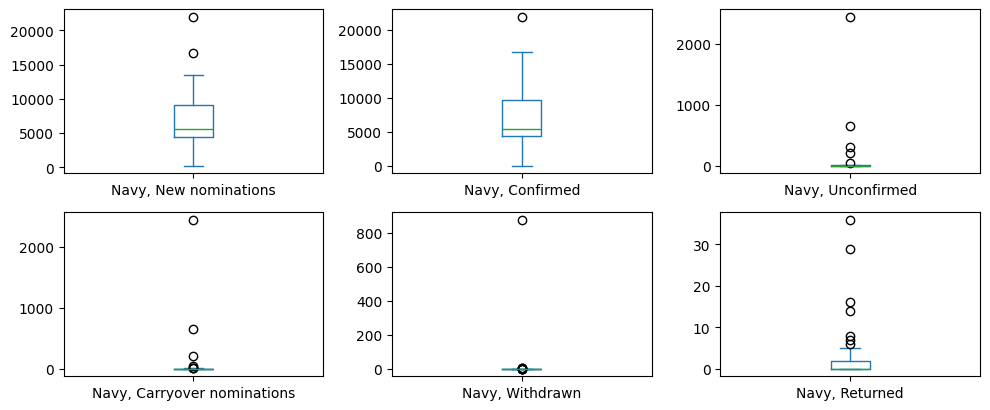

In [88]:
# Check for data outliers - Navy
cols_to_plot = confirm_df[confirm_df.columns[confirm_df.columns.str.startswith('Navy')]].columns.to_list()
confirm_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [89]:
# Take a closer look at the numbers
confirm_df[cols_to_plot].describe().astype('int')

,"Navy, New nominations","Navy, Confirmed","Navy, Unconfirmed","Navy, Carryover nominations","Navy, Withdrawn","Navy, Returned"
count,40,40,40,40,40,40
mean,7162,7118,94,86,22,3
std,4200,4218,398,397,138,7
min,204,0,0,0,0,0
25%,4446,4449,0,0,0,0
50%,5589,5436,1,0,0,0
75%,9129,9638,9,4,0,2
max,21994,21994,2444,2444,878,36


In [91]:
# Review outliers in Navy, New nominations column
temp_df = confirm_df.sort_values('Navy, New nominations', ascending=False)
temp_df[['Congress', 'Session', 'Navy, New nominations']].head()

,Congress,Session,"Navy, New nominations"
0,98,1,21994
2,99,1,16721
8,102,1,13541
6,101,1,12908
12,104,1,12106


In [92]:
# Review outliers in Navy, Confirmed column
temp_df = confirm_df.sort_values('Navy, Confirmed', ascending=False)
temp_df[['Congress', 'Session', 'Navy, Confirmed']].head()

,Congress,Session,"Navy, Confirmed"
0,98,1,21994.0
2,99,1,16720.0
8,102,1,13538.0
6,101,1,12704.0
12,104,1,12077.0


In [93]:
# Review outliers in Navy, Unconfirmed column
temp_df = confirm_df.sort_values('Navy, Unconfirmed', ascending=False)
temp_df[['Congress', 'Session', 'Navy, Unconfirmed']].head()

,Congress,Session,"Navy, Unconfirmed"
20,108,1,2444.0
10,103,1,657.0
9,102,2,305.0
6,101,1,204.0
4,100,1,46.0


In [94]:
# Review outliers in Navy, Carryover nominations column
temp_df = confirm_df.sort_values('Navy, Carryover nominations', ascending=False)
temp_df[['Congress', 'Session', 'Navy, Carryover nominations']].head()

,Congress,Session,"Navy, Carryover nominations"
21,108,2,2444.0
11,103,2,657.0
7,101,2,204.0
5,100,2,46.0
23,109,2,21.0


In [95]:
# Review outliers in Navy, Withdrawn column
temp_df = confirm_df.sort_values('Navy, Withdrawn', ascending=False)
temp_df[['Congress', 'Session', 'Navy, Withdrawn']].head()

,Congress,Session,"Navy, Withdrawn"
10,103,1,878.0
9,102,2,3.0
11,103,2,2.0
33,114,2,2.0
25,110,2,1.0


In [96]:
# Review outliers in Navy, Returned column
temp_df = confirm_df.sort_values('Navy, Returned', ascending=False)
temp_df[['Congress', 'Session', 'Navy, Returned']].head()

,Congress,Session,"Navy, Returned"
25,110,2,36
18,107,1,29
21,108,2,16
19,107,2,14
12,104,1,8


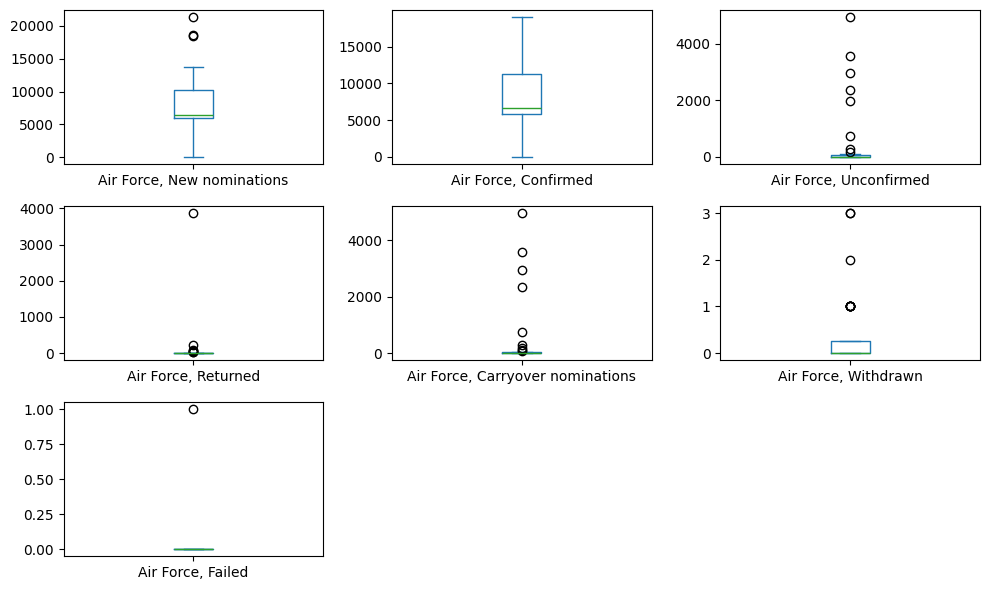

In [97]:
# Check for data outliers - Air Force
cols_to_plot = confirm_df[confirm_df.columns[confirm_df.columns.str.startswith('Air Force')]].columns.to_list()
confirm_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [98]:
# Take a closer look at the numbers
confirm_df[cols_to_plot].describe().astype('int')

,"Air Force, New nominations","Air Force, Confirmed","Air Force, Unconfirmed","Air Force, Returned","Air Force, Carryover nominations","Air Force, Withdrawn","Air Force, Failed"
count,40,40,40,40,40,40,40
mean,8466,8353,435,109,384,0,0
std,4258,3904,1116,610,1090,0,0
min,27,0,0,0,0,0,0
25%,5982,5877,0,0,0,0,0
50%,6486,6655,4,0,0,0,0
75%,10250,11217,56,6,26,0,0
max,21367,19013,4952,3870,4952,3,1


In [99]:
# Review outliers in Air Force, New nominations column
temp_df = confirm_df.sort_values('Air Force, New nominations', ascending=False)
temp_df[['Congress', 'Session', 'Air Force, New nominations']].head()

,Congress,Session,"Air Force, New nominations"
2,99,1,21367
4,100,1,18667
12,104,1,18521
8,102,1,13777
10,103,1,13741


In [100]:
# Review outliers in Air Force, Unconfirmed column
temp_df = confirm_df.sort_values('Air Force, Unconfirmed', ascending=False)
temp_df[['Congress', 'Session', 'Air Force, Unconfirmed']].head()

,Congress,Session,"Air Force, Unconfirmed"
12,104,1,4952.0
20,108,1,3572.0
4,100,1,2955.0
2,99,1,2354.0
7,101,2,1977.0


In [101]:
# Review outliers in Air Force, Returned column
temp_df = confirm_df.sort_values('Air Force, Returned', ascending=False)
temp_df[['Congress', 'Session', 'Air Force, Returned']].head()

,Congress,Session,"Air Force, Returned"
21,108,2,3870
31,113,2,223
33,114,2,73
39,117,2,50
18,107,1,47


In [102]:
# Review outliers in Air Force, Carryover nominations column
temp_df = confirm_df.sort_values('Air Force, Carryover nominations', ascending=False)
temp_df[['Congress', 'Session', 'Air Force, Carryover nominations']].head()

,Congress,Session,"Air Force, Carryover nominations"
13,104,2,4952.0
21,108,2,3572.0
5,100,2,2955.0
3,99,2,2354.0
27,111,2,759.0


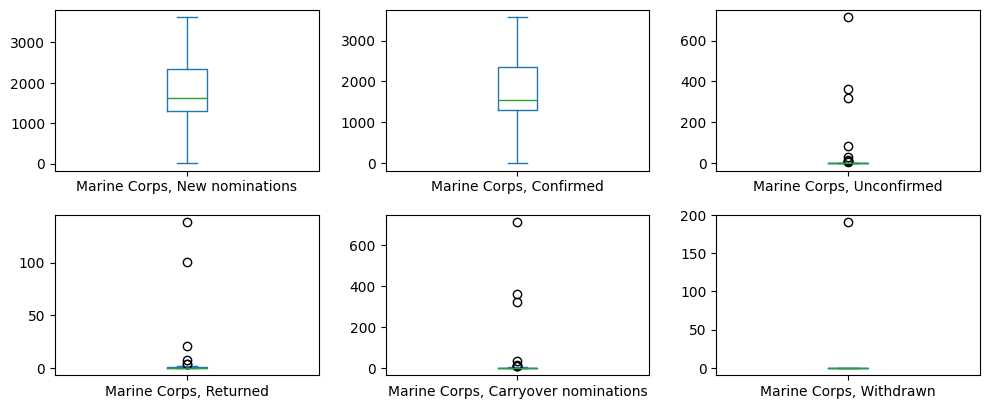

In [112]:
# Check for data outliers - Marine Corps
cols_to_plot = confirm_df[confirm_df.columns[confirm_df.columns.str.startswith('Marine Corps')]].columns.to_list()
confirm_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [106]:
# Take a closer look at the numbers
confirm_df[cols_to_plot].describe().astype('int')

,"Marine Corps, New nominations","Marine Corps, Confirmed","Marine Corps, Unconfirmed","Marine Corps, Returned","Marine Corps, Carryover nominations","Marine Corps, Withdrawn"
count,40,40,40,40,40,40
mean,1781,1766,39,7,37,4
std,803,769,133,26,133,30
min,11,0,0,0,0,0
25%,1308,1307,0,0,0,0
50%,1615,1551,0,0,0,0
75%,2352,2357,3,1,2,0
max,3625,3571,714,139,714,191


In [108]:
# Review outliers in Marine Corps, Unconfirmed column
temp_df = confirm_df.sort_values('Marine Corps, Unconfirmed', ascending=False)
temp_df[['Congress', 'Session', 'Marine Corps, Unconfirmed']].head()

,Congress,Session,"Marine Corps, Unconfirmed"
26,111,1,714.0
2,99,1,362.0
38,117,1,321.0
9,102,2,84.0
18,107,1,33.0


In [109]:
# Review outliers in Marine Corps, Returned column
temp_df = confirm_df.sort_values('Marine Corps, Returned', ascending=False)
temp_df[['Congress', 'Session', 'Marine Corps, Returned']].head()

,Congress,Session,"Marine Corps, Returned"
27,111,2,139
37,116,2,101
18,107,1,21
19,107,2,8
21,108,2,4


In [110]:
# Review outliers in Marine Corps, Carryover nominations column
temp_df = confirm_df.sort_values('Marine Corps, Carryover nominations', ascending=False)
temp_df[['Congress', 'Session', 'Marine Corps, Carryover nominations']].head()

,Congress,Session,"Marine Corps, Carryover nominations"
27,111,2,714.0
3,99,2,362.0
39,117,2,321.0
19,107,2,33.0
11,103,2,15.0


***
<font color='blue'>**Note:**</font>  
Data for Space Force nominations and their dispositions were not reviewed for outliers. Data only exists for this branch for 3 sessions of Congress, which is not enough to evaluate mathematically.
***

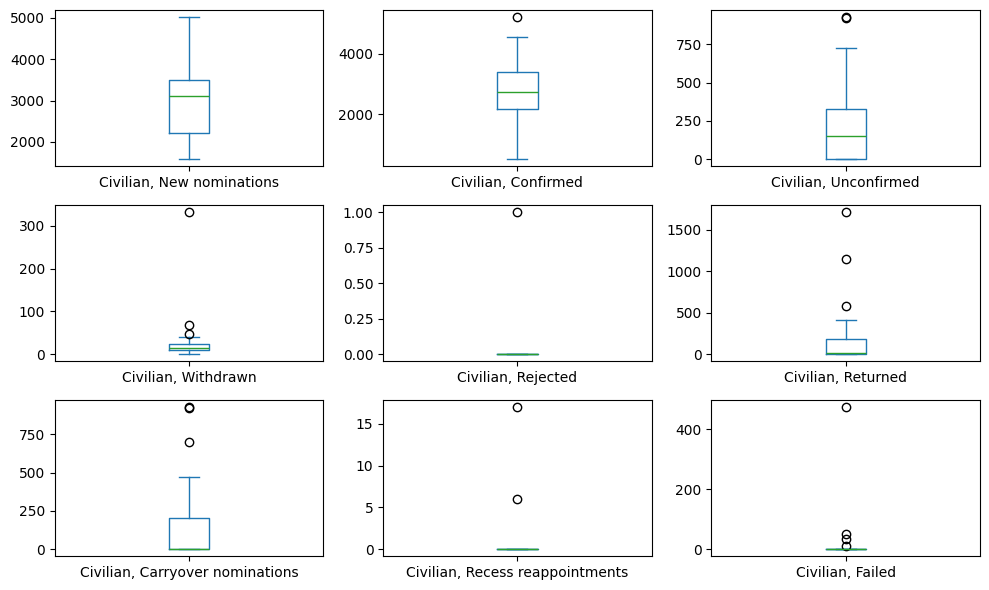

In [114]:
# Check for data outliers - Civilian
cols_to_plot = confirm_df[confirm_df.columns[confirm_df.columns.str.startswith('Civilian')]].columns.to_list()
confirm_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [115]:
# Take a closer look at the numbers
confirm_df[cols_to_plot].describe().astype('int')

,"Civilian, New nominations","Civilian, Confirmed","Civilian, Unconfirmed","Civilian, Withdrawn","Civilian, Rejected","Civilian, Returned","Civilian, Carryover nominations","Civilian, Recess reappointments","Civilian, Failed"
count,40,40,40,40,40,40,40,40,40
mean,3034,2780,228,25,0,151,145,0,14
std,898,951,260,51,0,332,242,2,75
min,1581,505,0,0,0,0,0,0,0
25%,2211,2178,0,10,0,0,0,0,0
50%,3103,2750,151,13,0,11,0,0,0
75%,3500,3384,329,23,0,178,202,0,0
max,5019,5225,928,332,1,1710,928,17,474


In [116]:
# Review outliers in Civilian, Confirmed column
temp_df = confirm_df.sort_values('Civilian, Confirmed', ascending=False)
temp_df[['Congress', 'Session', 'Civilian, Confirmed']].head()

,Congress,Session,"Civilian, Confirmed"
29,112,2,5225
4,100,1,4569
21,108,2,4415
24,110,1,4075
1,98,2,4001


In [117]:
# Review outliers in Civilian, Unconfirmed column
temp_df = confirm_df.sort_values('Civilian, Unconfirmed', ascending=False)
temp_df[['Congress', 'Session', 'Civilian, Unconfirmed']].head()

,Congress,Session,"Civilian, Unconfirmed"
22,109,1,928
16,106,1,920
13,104,2,724
18,107,1,701
38,117,1,594


In [118]:
# Review outliers in Civilian, Withdrawn column
temp_df = confirm_df.sort_values('Civilian, Withdrawn', ascending=False)
temp_df[['Congress', 'Session', 'Civilian, Withdrawn']].head()

,Congress,Session,"Civilian, Withdrawn"
32,114,1,332
18,107,1,69
38,117,1,47
25,110,2,40
34,115,1,36


In [119]:
# Review outliers in Civilian, Returned column
temp_df = confirm_df.sort_values('Civilian, Returned', ascending=False)
temp_df[['Congress', 'Session', 'Civilian, Returned']].head()

,Congress,Session,"Civilian, Returned"
30,113,1,1710
31,113,2,1149
39,117,2,585
18,107,1,414
25,110,2,363


In [120]:
# Review outliers in Civilian, Carryover nominations column
temp_df = confirm_df.sort_values('Civilian, Carryover nominations', ascending=False)
temp_df[['Congress', 'Session', 'Civilian, Carryover nominations']].head()

,Congress,Session,"Civilian, Carryover nominations"
23,109,2,928
17,106,2,920
19,107,2,701
39,117,2,472
13,104,2,439


In [121]:
# Review outliers in Civilian, Failed column
temp_df = confirm_df.sort_values('Civilian, Failed', ascending=False)
temp_df[['Congress', 'Session', 'Civilian, Failed']].head()

,Congress,Session,"Civilian, Failed"
0,98,1,474
6,101,1,50
2,99,1,34
8,102,1,10
31,113,2,0


***
## Validate Session Totals
***

***
**End**
***